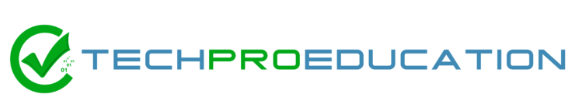

🅱️🅰️🆃🅲🅷 106

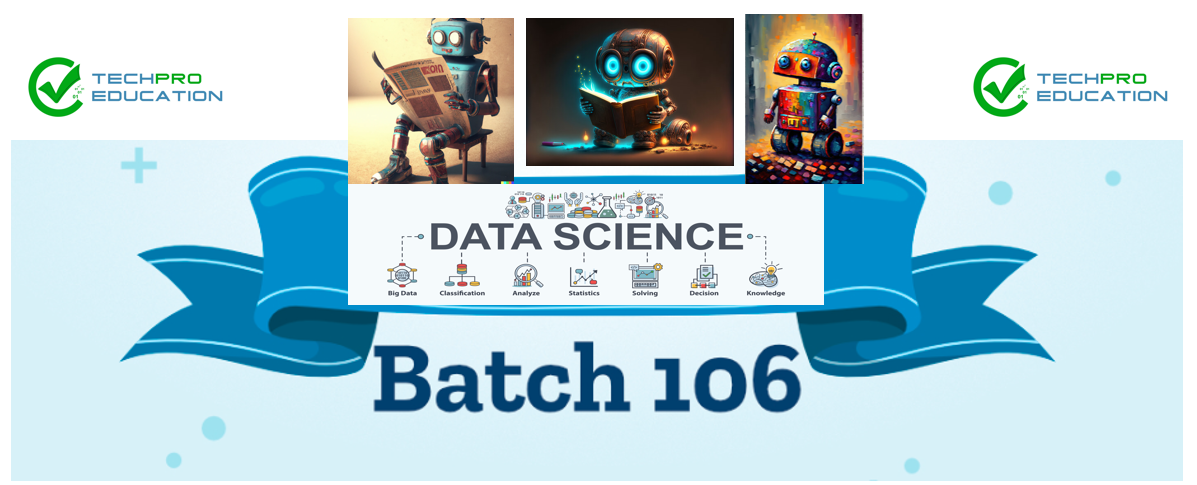

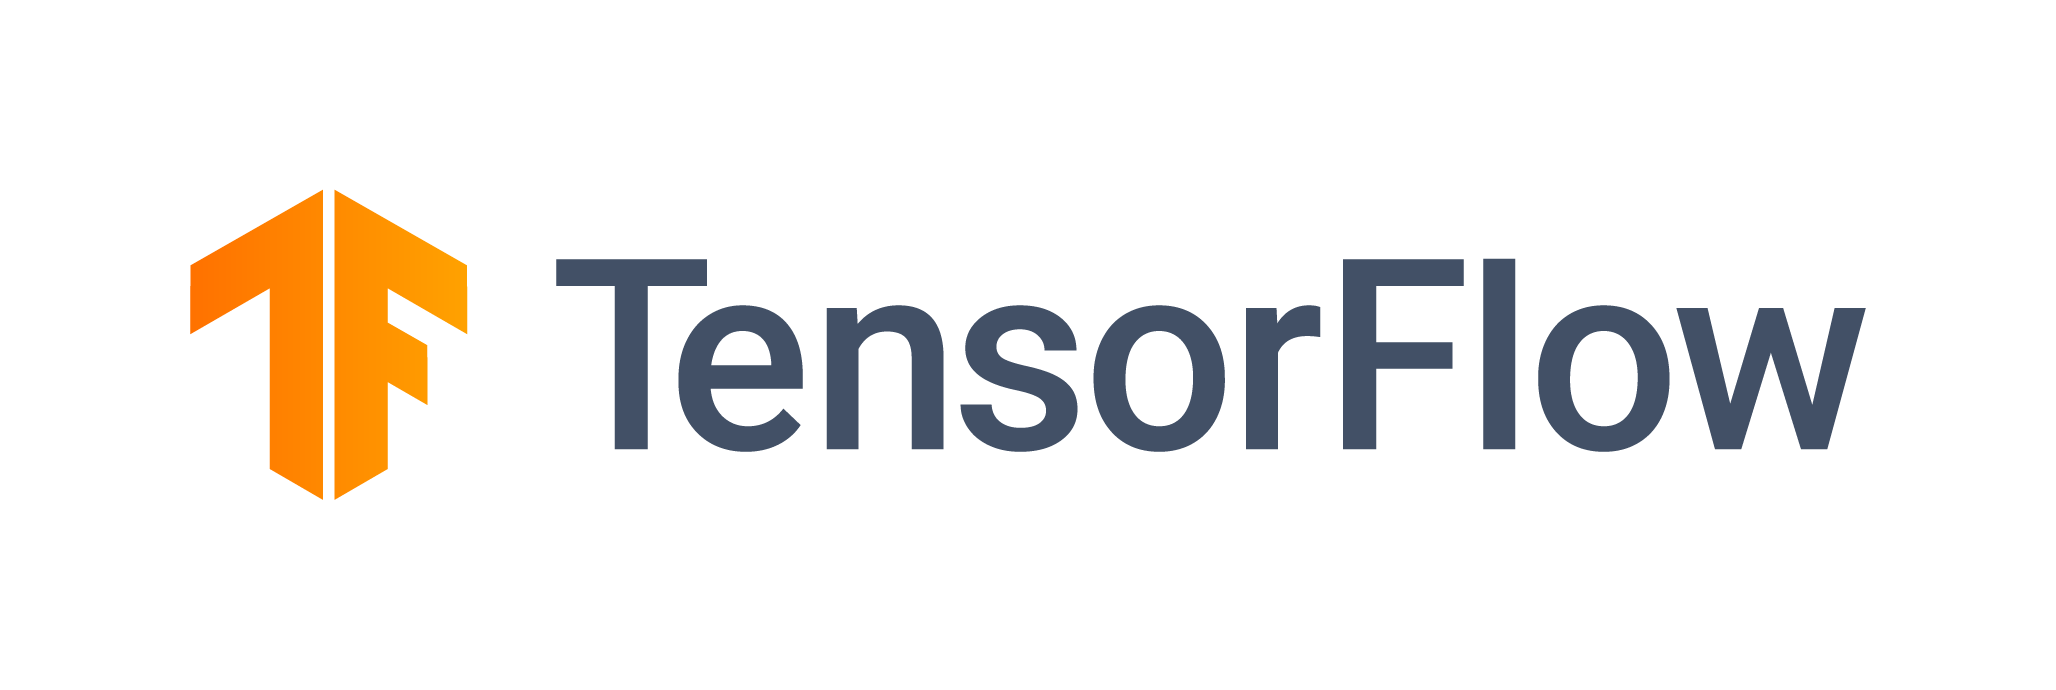

TensorFlow, Google tarafından geliştirilen ve sürdürülen açık kaynaklı bir derin öğrenme kitaplığıdır. Bir dizi makine öğrenimi görevini gerçekleştiren veri akışı programlaması sunar. 

TensorFlow’un anlamı, açık kaynak kodlarını içerisinde barındıran derin öğrenme (Deep learning) kütüphanesi olarak ifade edilmektedir. TensorFlow’un esnek yapısı, tek API (Application Programming İnterface), uygulama programlama arayüzü ile tüm platformlarda hesapların yapılmasını sağlamaktadır. 

TensorFlow, bir ya da daha fazla merkezi işlem birimi (CPU) ve grafik işlemlerini yürüten işlemcileri (GPU) kullanarak, harekete geçirme, konuşlandırma (Deploy etme) işlemlerinin yapılmasını yürütmektedir. Temelinde Python programlama dili kullanımı ile geliştirilmiş olan TensorFlow’un, günümüz uygulamalarında Python dışında C++, Java, C#, JavaScript gibi birçok farklı programlama dilini de desteklediği görülmektedir. 

JavaScript desteğiyle, TensorFlow.js ile internet tarayıcıları üzerinden yapay zekâ konularını içeren birçok işlem de yapılabilmektedir. TensorFlow.js aracılığıyla makine öğrenmesi modellerinin tarayıcılar üzerinden geliştirilmesi ve eğitilmesi mümkün olmaktadır.

KERAS , Theano veya Tensorflow'un üzerinde çalışan, Python'da yazılmış bir Açık Kaynak Sinir Ağı kitaplığıdır. Modüler, hızlı ve kullanımı kolay olacak şekilde tasarlanmıştır. Bir Google mühendisi olan François Chollet tarafından geliştirilmiştir. Herhangi bir derin öğrenme algoritması oluşturmak için kullanışlı bir kütüphanedir.

# Installing Tensorflow

In [1]:
# pip install tensorflow

In [2]:
import tensorflow as tf
tf.__version__

'2.12.0'

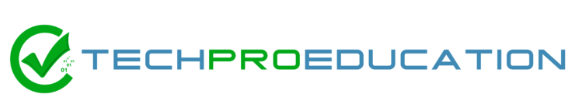

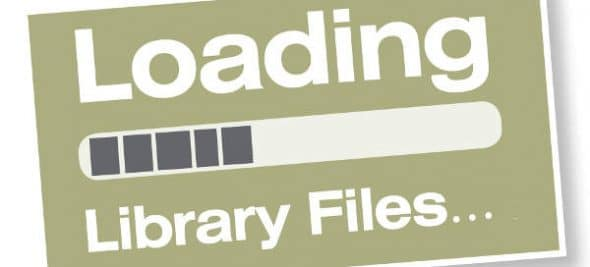

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show") 

# Uyarı mesajlarını göstermemek için uyarı filtresi uygular. 
# Bu, kodu çalıştırdığınızda uyarı mesajlarının görünmesini engeller.


plt.rcParams["figure.figsize"] = (10,6)
# Matplotlib kütüphanesindeki grafik boyutlarını (figür boyutu) ayarlar. 
# Burada (10,6), genişliği 10 ve yüksekliği 6 birim olan bir çerçeve boyutu belirtilir.

sns.set_style("whitegrid")
# Seaborn kütüphanesindeki grid görünümünü beyaz bir arka planla ayarlar.

pd.set_option('display.float_format', lambda x: '%.3f' % x)
# pandas kütüphanesindeki float formatını ayarlar. 
# Burada lambda fonksiyonu kullanılarak, ondalık sayıların görüntülenme formatı ayarlanır.

pd.set_option('display.max_rows', None)
# veri çerçevelerindeki tüm satırların görüntülenmesini istemiyorsanız, display.max_rows seçeneğini None olarak ayarlar.

pd.set_option('display.max_columns', None)
# veri çerçevelerindeki tüm sütunların görüntülenmesini istemiyorsanız, display.max_columns seçeneğini None olarak ayarlar.


In [4]:
df = pd.read_csv("fake_reg.csv")

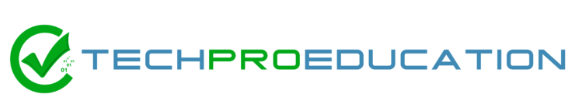

## Exploratory Data Analysis and Visualization

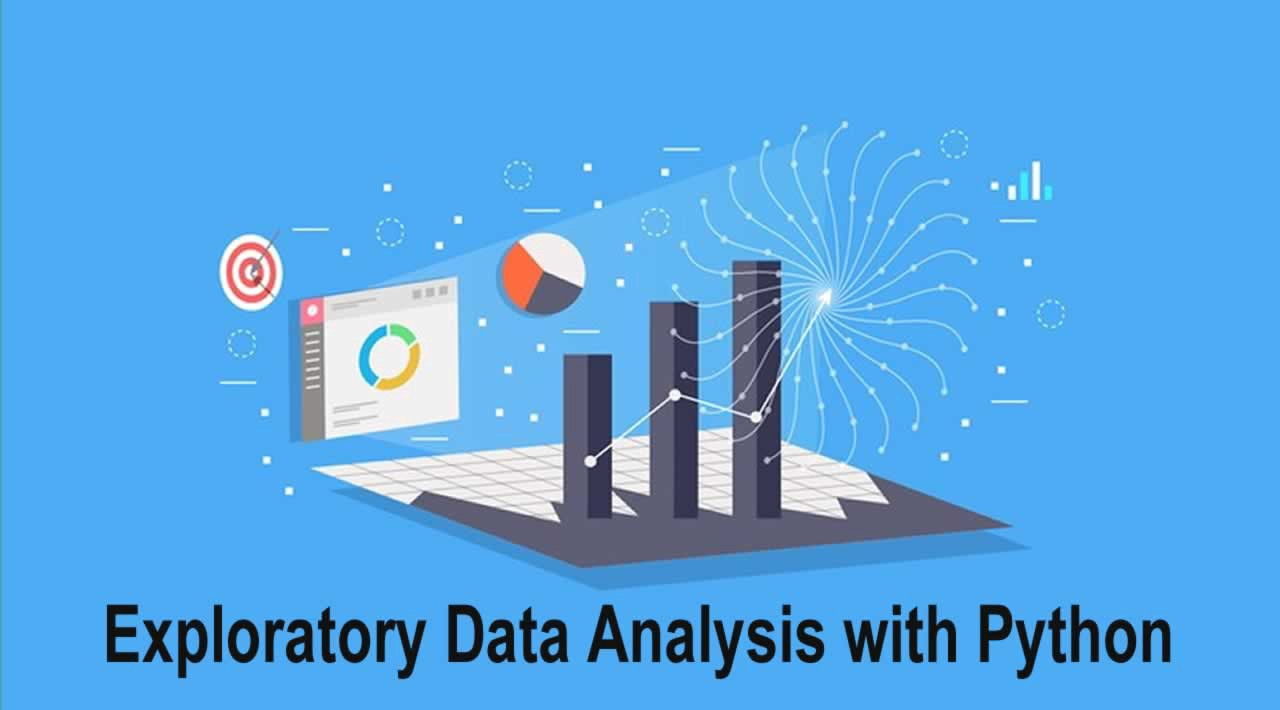

In [5]:
df.head()

,price,feature1,feature2
0,461.528,999.788,999.766
1,548.130,998.862,1001.042
2,410.297,1000.070,998.844
3,540.382,999.952,1000.441
4,546.025,1000.446,1000.339


In [6]:
df.tail()

,price,feature1,feature2
995,476.526,1000.019,999.673
996,457.313,998.855,1000.020
997,456.721,1001.452,998.848
998,403.316,1000.771,998.563
999,599.367,999.232,1001.451


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     1000 non-null   float64
 1   feature1  1000 non-null   float64
 2   feature2  1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


In [8]:
df.describe()

,price,feature1,feature2
count,1000.000,1000.000,1000.000
mean,498.673,1000.014,999.980
std,93.785,0.974,0.948
min,223.347,997.058,996.996
25%,433.026,999.332,999.316
50%,502.382,1000.010,1000.002
75%,564.922,1000.638,1000.645
max,774.408,1003.208,1002.666


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,1000.000,498.673,93.785,223.347,433.026,502.382,564.922,774.408
feature1,1000.000,1000.014,0.974,997.058,999.332,1000.010,1000.638,1003.208
feature2,1000.000,999.980,0.948,996.996,999.316,1000.002,1000.645,1002.666


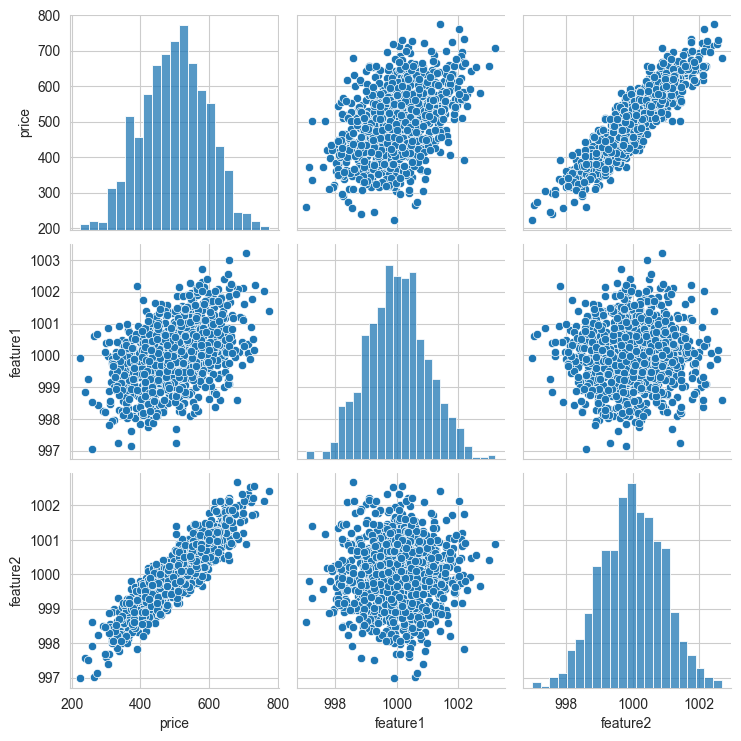

In [10]:
sns.pairplot(df);

In [11]:
df.corr()

,price,feature1,feature2
price,1.000,0.444,0.908
feature1,0.444,1.000,0.031
feature2,0.908,0.031,1.000


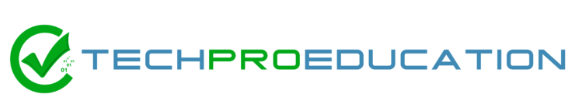

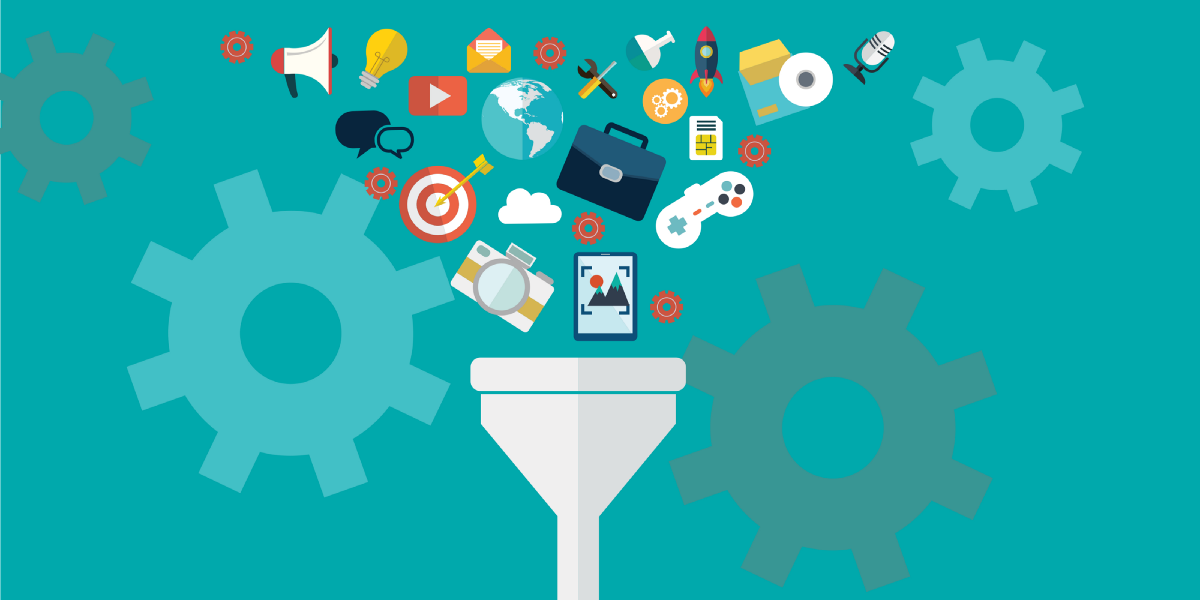

## Preprocessing of Data
- Train | Test Split, Scalling

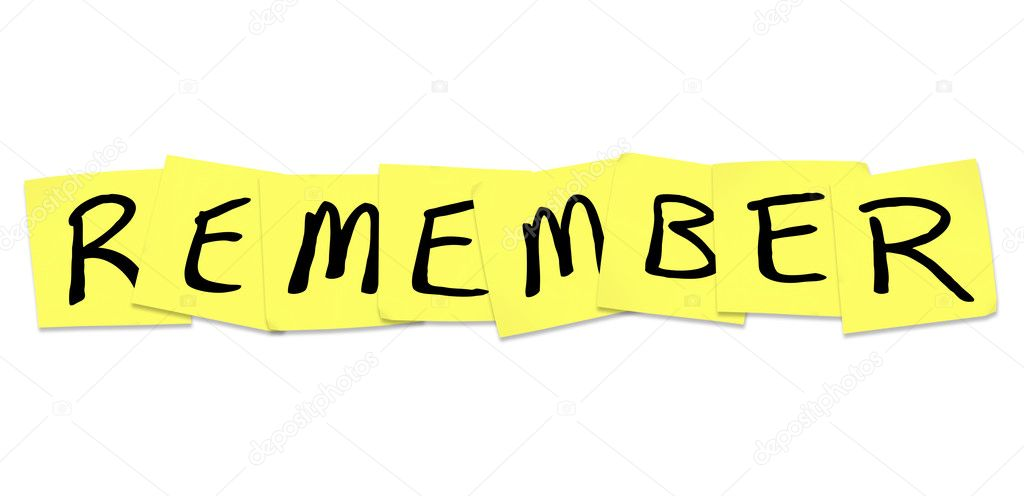

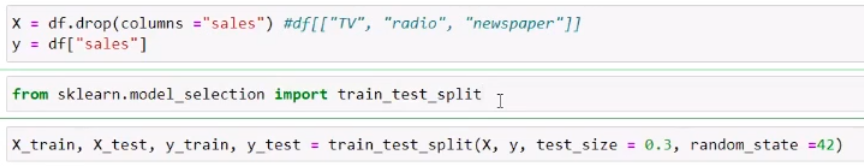

NumPy, çok boyutlu dizileri (array) yönetmek için kullanılan bir kütüphanedir. NumPy, özellikle matematiksel işlemler için optimize edilmiştir ve büyük veri kümeleriyle verimli bir şekilde çalışabilir. NumPy dizileri, bellek kullanımını en aza indirgemek için verileri sıkıştırır ve çok hızlı işlem yapmak için optimize edilmiştir.

Dataframe ise, tablo verilerini işlemek için kullanılan bir yapıdır. Pandas kütüphanesi tarafından sağlanır. DataFrame, verileri satırlar ve sütunlar halinde düzenler ve verileri etiketli olarak depolar. DataFrame, birçok veri işleme görevi için kullanışlıdır, özellikle verileri filtrelemek, sıralamak, birleştirmek, gruplamak ve birçok farklı yolla dönüştürmek için kullanılabilir.

DataFrame ve NumPy arasındaki farklar şunlardır:

DataFrame, verileri satırlar ve sütunlar halinde depolarken, NumPy dizileri sadece çok boyutlu dizileri depolar.
DataFrame, verileri etiketli olarak depolarken, NumPy dizileri, verileri sıralı olarak depolar.
DataFrame, verileri farklı tiplerde sütunlar halinde depolarken, NumPy dizileri aynı tipte verileri depolar.
Birçok veri bilimci, genellikle veri ön işleme işlemlerinde DataFrame kullanırken, model eğitimi ve tahmininde NumPy dizilerini kullanmayı tercih eder.

Makine öğrenimi modellerinin birçoğu, girdi olarak NumPy dizilerini kullanır. Bu nedenle, verileriniz bir NumPy dizisi olarak sağlandığında, daha hızlı ve verimli bir şekilde işlenebilirler.

NumPy dizileri, matematiksel işlemler yapmak için optimize edilmiştir ve bu nedenle, verilerinizi NumPy dizilerine dönüştürmek, verilerinizi işlemenin daha hızlı ve daha verimli bir yolunu sağlayabilir.

Ayrıca, NumPy dizileri, verilerinizi bellekte daha verimli bir şekilde depolamanızı sağlar. Verilerinizi bir DataFrame'de saklarsanız, DataFrame'in boyutu büyükse, bu bellek kullanımı açısından maliyetli olabilir. Ancak, NumPy dizileri daha az bellek kullanır ve bu nedenle büyük veri kümeleriyle çalışırken avantaj sağlar.

Ancak, bazı durumlarda, makine öğrenimi modelleri, girdi olarak bir NumPy dizisi gerektirir. Bu durumlarda, DataFrame'deki sütunları bir NumPy dizisine dönüştürmeniz gerekebilir.

Örneğin, yapay sinir ağları (ANN), sıklıkla girdi olarak NumPy dizileri kullanır ve bu nedenle, bir DataFrame'deki sütunları bir NumPy dizisine dönüştürmek, verileri yapay sinir ağı modeline girdi olarak verebilmek için gereklidir.

Ancak, diğer makine öğrenimi modelleri (örneğin, karar ağaçları veya destek vektör makineleri), DataFrame üzerinde doğrudan çalışabilir ve bu nedenle, verileri bir NumPy dizisine dönüştürmek zorunda kalmazsınız. Bu nedenle, yapmanız gereken şey, veri yapınıza ve kullandığınız makine öğrenimi modeline bağlıdır.

Son olarak, bazı makine öğrenimi modelleri, girdileri NumPy dizileri olarak bekler. Bu nedenle, verilerinizi NumPy dizilerine dönüştürerek, bu modelleri kullanmanızı kolaylaştırabilirsiniz.

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X = df[['feature1', 'feature2']].values  
y = df['price'].values

pandas DataFrame içindeki 'feature1' ve 'feature2' sütunlarını seçer ve bu sütunları bir NumPy dizisine dönüştürür.

values özelliği, DataFrame'in sadece değerlerini (yani sütun adlarını ve satır endekslerini dışarıda bırakarak) içeren bir NumPy dizisi döndürür. Bu şekilde, seçilen sütunlar NumPy dizisine dönüştürülebilir ve daha sonra bir makine öğrenimi modeli gibi NumPy dizileri ile çalışan işlevlere giriş olarak verilebilir.

In [14]:
X

array([[ 999.78755752,  999.7660962 ],
       [ 998.86161491, 1001.04240315],
       [1000.07026691,  998.84401463],
       ...,
       [1001.45164617,  998.84760554],
       [1000.77102275,  998.56285086],
       [ 999.2322436 , 1001.45140713]])

In [15]:
y

array([461.52792939, 548.13001146, 410.29716167, 540.38221981,
       546.02455292, 542.9836716 , 555.48566416, 417.56972453,
       373.14653122, 633.35029248, 624.24709206, 475.37241721,
       600.36844486, 532.83295175, 472.8353628 , 506.31229096,
       508.414406  , 610.4553519 , 323.65776198, 446.21230389,
       362.12270299, 433.41064026, 562.00257647, 637.30962074,
       522.80800754, 469.8028243 , 543.10992778, 565.43416994,
       530.03285381, 610.58016503, 482.55641188, 327.56004052,
       579.73083872, 448.42981468, 628.97709187, 536.79737216,
       570.06729543, 357.82557519, 612.08492732, 444.67970846,
       600.1186364 , 523.53312776, 512.94994495, 614.8813169 ,
       404.35303251, 643.68851807, 488.95660398, 443.20468572,
       514.47906638, 514.88174058, 325.05852217, 554.6620585 ,
       451.39140001, 587.67887726, 477.73749721, 574.51560687,
       548.9107991 , 528.69088356, 443.21100482, 397.88209319,
       355.79535223, 460.69478138, 534.7673737 , 537.60

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [17]:
X_train.shape

(700, 2)

In [18]:
X_test.shape

(300, 2)

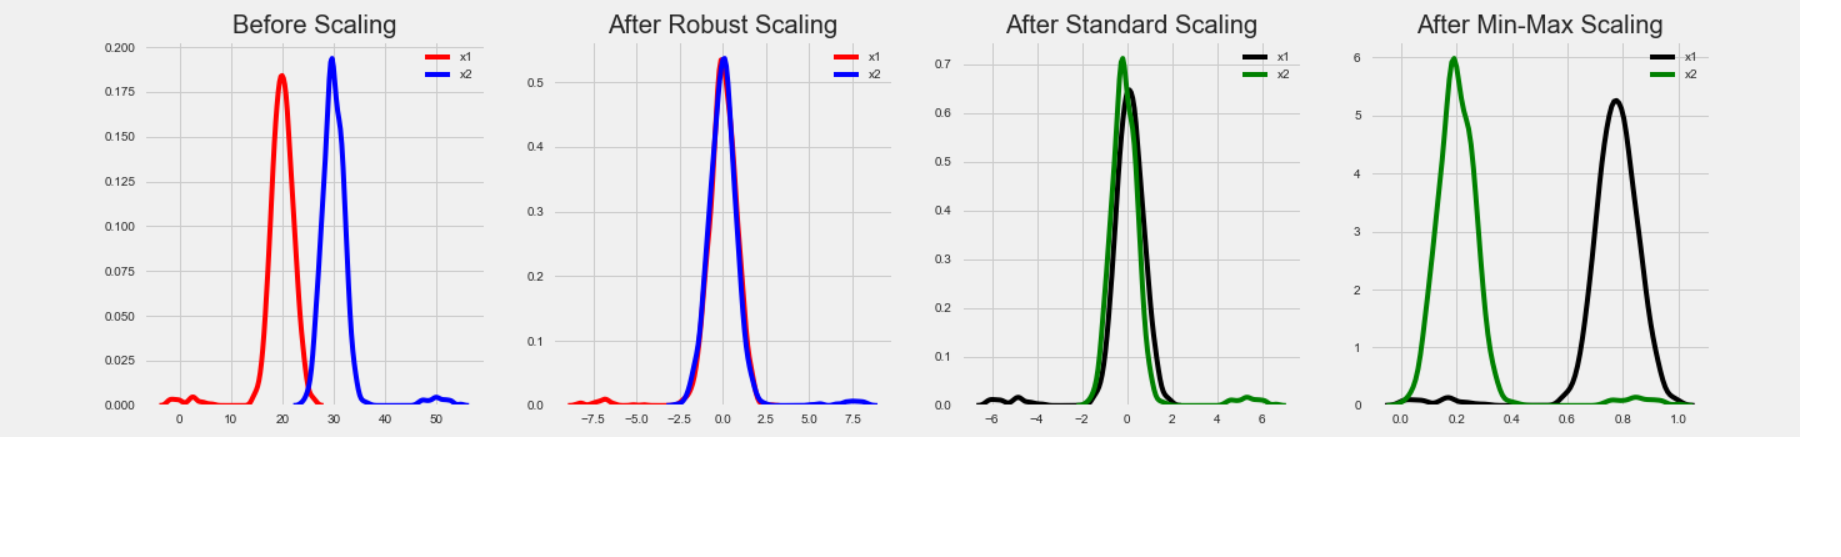

Deep Learning modellerinde, verilerin ölçeklendirilmesi ve normalleştirilmesi için çeşitli scaler yöntemleri kullanılabilir. Hangi scaler yönteminin kullanılması gerektiği, veri setinin özelliklerine, modelin yapısına ve kullanılacak optimizer algoritmasına bağlıdır. Aşağıda yaygın olarak kullanılan scaler yöntemlerini açıklamak istiyorum:

Min-Max Scaler: Bu yöntem, verileri belirli bir aralığa indirger. Verileri minimum ve maksimum değerleri arasında belirli bir aralığa ölçeklendirerek yapılır. Bu yöntem, genellikle 0 ile 1 arasında ölçeklendirme yapmak için kullanılır.

Standard Scaler: Bu yöntem, verilerin ortalamasını 0 ve standart sapmasını 1 olarak ölçeklendirir. Verilerin dağılımını merkezileştirerek yapılır. Bu yöntem, genellikle verilerin normal dağıldığı durumlarda kullanılır.

Robust Scaler: Bu yöntem, verilerin ortanca değerini 0 ve yüzdelik aralığını belirli bir aralığa indirger. Verilerin dağılımını merkezileştirerek yapılır. Bu yöntem, verilerde aykırı değerlerin olduğu durumlarda kullanılır.

MaxAbs Scaler: Bu yöntem, verilerin maksimum mutlak değerini 1 olarak ölçeklendirir. Bu yöntem, özellikle sparse matris verileri için kullanılır.

Hangi scaler yönteminin kullanılacağı, veri setinin özelliklerine ve modelin yapısına bağlıdır. Genellikle, Min-Max scaler veya Standard scaler kullanmak iyi sonuçlar verir. Ancak, farklı scaler yöntemleri farklı veri setleri ve modeller için daha iyi sonuçlar verebilir.

In [19]:
from sklearn.preprocessing import MinMaxScaler 

In [20]:
help(MinMaxScaler)

Help on class MinMaxScaler in module sklearn.preprocessing._data:

class MinMaxScaler(sklearn.base._OneToOneFeatureMixin, sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  MinMaxScaler(feature_range=(0, 1), *, copy=True, clip=False)
 |  
 |  Transform features by scaling each feature to a given range.
 |  
 |  This estimator scales and translates each feature individually such
 |  that it is in the given range on the training set, e.g. between
 |  zero and one.
 |  
 |  The transformation is given by::
 |  
 |      X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
 |      X_scaled = X_std * (max - min) + min
 |  
 |  where min, max = feature_range.
 |  
 |  This transformation is often used as an alternative to zero mean,
 |  unit variance scaling.
 |  
 |  Read more in the :ref:`User Guide <preprocessing_scaler>`.
 |  
 |  Parameters
 |  ----------
 |  feature_range : tuple (min, max), default=(0, 1)
 |      Desired range of transformed data.
 |  
 |  copy : b

Yapay sinir ağı (ANN) modellerinde verilerin ölçeklendirilmesi ve normalleştirilmesi, eğitim performansını artırmak ve daha iyi sonuçlar elde etmek için önemlidir. Min-Max normalizasyonu, verileri belirli bir aralıkta ölçeklendirmek için kullanılan bir yöntemdir. Bu yöntem, verileri minimum ve maksimum değerleri arasında belirli bir aralığa indirger. Örneğin, [0,1] aralığına ölçeklendirme yapılabilir.

Min-Max normalizasyonu, verilerin her özelliği için minimum ve maksimum değerleri bulup, her özelliği bu minimum ve maksimum değer aralığında yeniden ölçeklendirerek yapılır. Bu sayede, verilerin farklı özellikleri arasındaki değer farklılıkları azalır ve daha homojen bir veri kümesi elde edilir.

Bu normalizasyon yöntemi, ANN'lerde sıklıkla kullanılır çünkü modelin verilerin arasındaki farklılıkları daha iyi anlamasına ve daha iyi sonuçlar üretmesine yardımcı olur.

In [21]:
scaler = MinMaxScaler() # Deep Learning de MinMax kullanmak daha iyidir!

In [22]:
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Sadece girdi verileri (X) ölçeklendirilir, çıktı verileri (y) ölçeklendirilmez. Bu nedenle, scaler.fit() fonksiyonu yalnızca X_train verilerine uygulanır ve X_train verileri ölçeklendirilir. Daha sonra, öğrenilen ölçekleme parametreleri (minimum ve maksimum değerler) kullanılarak, X_test verileri de ölçeklendirilir. Y_test ve y_train verilerinin ölçeklendirilmemesinin sebebi, bu verilerin çıktı değerleri olmasıdır ve bu değerlerin, girdi verileri gibi sayısal değerler olarak işlenmesi gerektiği için ölçeklendirme işlemine ihtiyaç duyulmaz.

X_train ve X_test olarak ikiye ayırıyor ve ardından scaler.fit() yöntemiyle eğitiyor. Daha sonra X_train ve X_test veri kümelerini scaler.transform() yöntemiyle ölçeklendiriyor. Bu, verilerin özelliklerinin aynı ölçekte olmasını sağlayarak daha iyi bir performans elde etmek için yapılan bir ön işlemdir.

In [23]:
X_train.max()

1.0

In [24]:
X_train.min()

0.0

In [25]:
X_test.max()   #train datasında scaler yaptığımızdan 0 ile 1 arasında değerler gelir  fakat test datasında 1 den büyük 0 dan küçük değerler olabilir

1.0186515935232023

In [26]:
X_test.min()

-0.014108392024525074

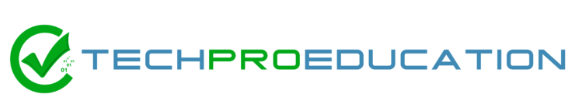

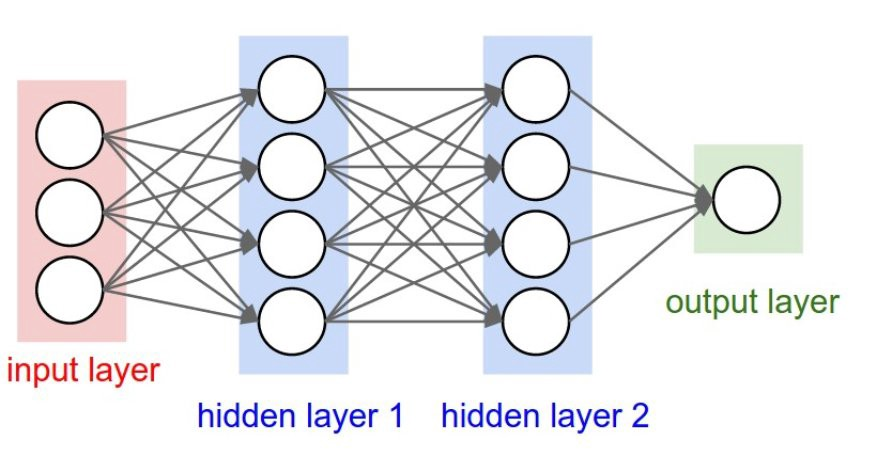

## Modelling

In [27]:
# pip install keras

In [28]:
import tensorflow as tf

In [29]:
from keras import models

In [30]:
from tensorflow.keras.layers import Dense, Activation

In [31]:
from tensorflow.keras.models import Sequential


In [32]:
help(Sequential) # arka arka katman oluşturmamı sağlayan yapıdır. ilk olarak modeli squental olarak tanımlarız.

Help on class Sequential in module keras.engine.sequential:

class Sequential(keras.engine.functional.Functional)
 |  Sequential(layers=None, name=None)
 |  
 |  `Sequential` groups a linear stack of layers into a `tf.keras.Model`.
 |  
 |  `Sequential` provides training and inference features on this model.
 |  
 |  Examples:
 |  
 |  ```python
 |  # Optionally, the first layer can receive an `input_shape` argument:
 |  model = tf.keras.Sequential()
 |  model.add(tf.keras.layers.Dense(8, input_shape=(16,)))
 |  # Afterwards, we do automatic shape inference:
 |  model.add(tf.keras.layers.Dense(4))
 |  
 |  # This is identical to the following:
 |  model = tf.keras.Sequential()
 |  model.add(tf.keras.Input(shape=(16,)))
 |  model.add(tf.keras.layers.Dense(8))
 |  
 |  # Note that you can also omit the `input_shape` argument.
 |  # In that case the model doesn't have any weights until the first call
 |  # to a training/evaluation method (since it isn't yet built):
 |  model = tf.keras.Se

In [33]:
help(Dense) # katman (layer) cinsi ANN'de en temal katman Dense'dir. fullyhelp(Dense) # katman (layer) cinsi ANN'de en temal katman Dense'dir. fulyconnected layer oluşturmak için Dense kulanılır.

Help on class Dense in module keras.layers.core.dense:

class Dense(keras.engine.base_layer.Layer)
 |  Dense(units, activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None, **kwargs)
 |  
 |  Just your regular densely-connected NN layer.
 |  
 |  `Dense` implements the operation:
 |  `output = activation(dot(input, kernel) + bias)`
 |  where `activation` is the element-wise activation function
 |  passed as the `activation` argument, `kernel` is a weights matrix
 |  created by the layer, and `bias` is a bias vector created by the layer
 |  (only applicable if `use_bias` is `True`). These are all attributes of
 |  `Dense`.
 |  
 |  Note: If the input to the layer has a rank greater than 2, then `Dense`
 |  computes the dot product between the `inputs` and the `kernel` along the
 |  last axis of the `inputs` and axis 0 of the `kern

Sequential sınıfı, bir modelin katmanlarını birbirine sırayla eklemek için kullanılan bir sınıftır. Bu şekilde, her katmanın çıkışı, bir sonraki katmanın girdisi olarak kullanılabilir. Bu da model oluşturmayı kolaylaştırır.

Dense ise, tam bağlı bir katman oluşturmak için kullanılan bir sınıftır. Tam bağlı katmanlar, önceki katmanın tüm çıktılarının sonraki katmana girdi olarak aktarıldığı katmanlardır.

Yani Sequential sınıfı, bir modelin katmanlarını sırayla eklemek için kullanılırken, Dense sınıfı, bir tam bağlı katman oluşturmak için kullanılır. Sequential sınıfında, her katman Dense sınıfı ile oluşturulabilir.

In [34]:
# First way to create model

model = Sequential([Dense(units = 4, input_dim=2, activation = "relu"),   # her bir dense bir layer'i  tanımlar 
                    Dense(units = 4, activation = "relu"),   # units kaç nöron olduğunu söyler fonksiyonuda Relu
                    Dense(units = 4, activation = "relu"),
                    Dense(units = 1)]) #output layer

input_dim, bir sinir ağı modelinin ilk katmanında kaç tane girdi değişkeni (input) olduğunu belirtmek için kullanılan bir parametredir. Bu, modelin ilk katmanına hangi boyutlu bir veri gireceğimizi belirler. Örneğin, eğer bir veri setinde her veri 100 özellikten oluşuyorsa, sinir ağı modelinin ilk katmanının input_dim parametresi 100 olarak belirlenir.

input_dim parametresinin doğru bir şekilde belirlenmesi, sinir ağı modelinin düzgün bir şekilde çalışmasına yardımcı olur. Eğer input_dim yanlış belirlenirse, sinir ağı modeli düzgün bir şekilde eğitilemez veya modelin performansı düşük olabilir.

bu model için girdi boyutu (input dimension) 2'dir. Eğer input_dim'i 100 yaparsak, modelin ilk katmanının 100 nörona sahip olacağını düşünürüz. Ancak veri setimizin boyutu hala 2 olduğu için, 100 nöronlu bir katman kullanmak gereksiz olurdu ve ayrıca ağın öğrenme kapasitesini arttırmak yerine aşırı öğrenmeye yol açabilir. Bu nedenle, veri setinin boyutuna uygun bir input_dim seçmeliyiz.

input_dim parametresini kaldırmak, modelin ilk katmanına verilecek özellik boyutunu belirtmediği anlamına gelir. Bu durumda, model eğitilirken kullanılan verinin özellik boyutuna bağlı olarak otomatik olarak belirlenecektir.

Bu durumda, eğitim veri setindeki özelliklerin boyutu otomatik olarak belirlenecektir. Bu, modelin esnekliğini bir ölçüde artırabilir, ancak bazı durumlarda, özellik boyutu sabit olarak belirlenmesi ve modelin bu boyuta göre optimize edilmesi daha iyi sonuçlar verebilir.

Dolayısıyla, input_dim parametresini kaldırmak, modelin daha fazla esnekliğe sahip olmasına neden olabilir, ancak hangi seçeneğin daha iyi olduğunu belirlemek için modelin eğitilmesi ve performansının değerlendirilmesi gerekmektedir.

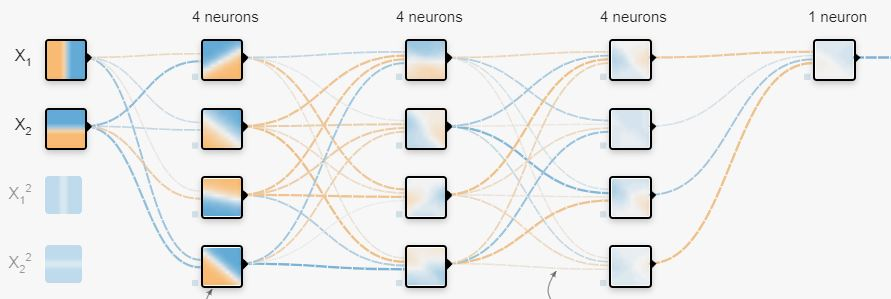

In [35]:
# Second way to create model (recommended)

model = Sequential()
model.add(Dense(units = 4, input_dim = X_train.shape[1], activation = "relu"))     
model.add(Dense(units = 4, activation = "relu"))
model.add(Dense(units = 4, activation = "relu"))
model.add(Dense(units = 1)) # regression problemi olduğu için 1 output var. 

X_train veri kümesinin sütun sayısı, yani özellik sayısı input_dim değişkenine atanıyor. Yani modele giren her bir veri örneği, input_dim boyutunda bir vektör olacak. Bu sayede model, girdi olarak beklenen boyutta bir vektör aldığını biliyor ve bu boyuttaki vektörler üzerinden işlem yaparak çıktı üretiyor. X_train.shape[1] ifadesi, X_train veri kümesinin boyutunu (n_samples, n_features) şeklinde veren bir NumPy dizisi döndürür. Burada n_features özellik sayısını temsil eder ve X_train.shape[1] ifadesi bu değere eşittir.

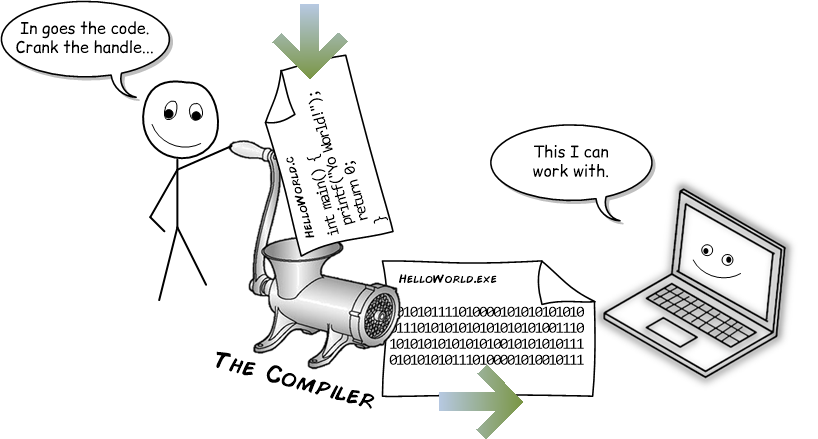

In [36]:
model = Sequential()
model.add(Dense(units = 4, activation = "relu"))     
model.add(Dense(units = 4, activation = "relu"))
model.add(Dense(units = 4, activation = "relu"))
model.add(Dense(units = 1)) # regression problemi olduğu için 1 output var. 

In [37]:
model.compile(optimizer="rmsprop", loss="mse")

#model kuruldu bu model nasıl çalışacak onu burada belirleriz
#optimizer mincost bulur geriye doğru optimize eder. rmsprop veya adam kullanılabilir
# loss loss function regression probleminde genelde mse kullanılır 

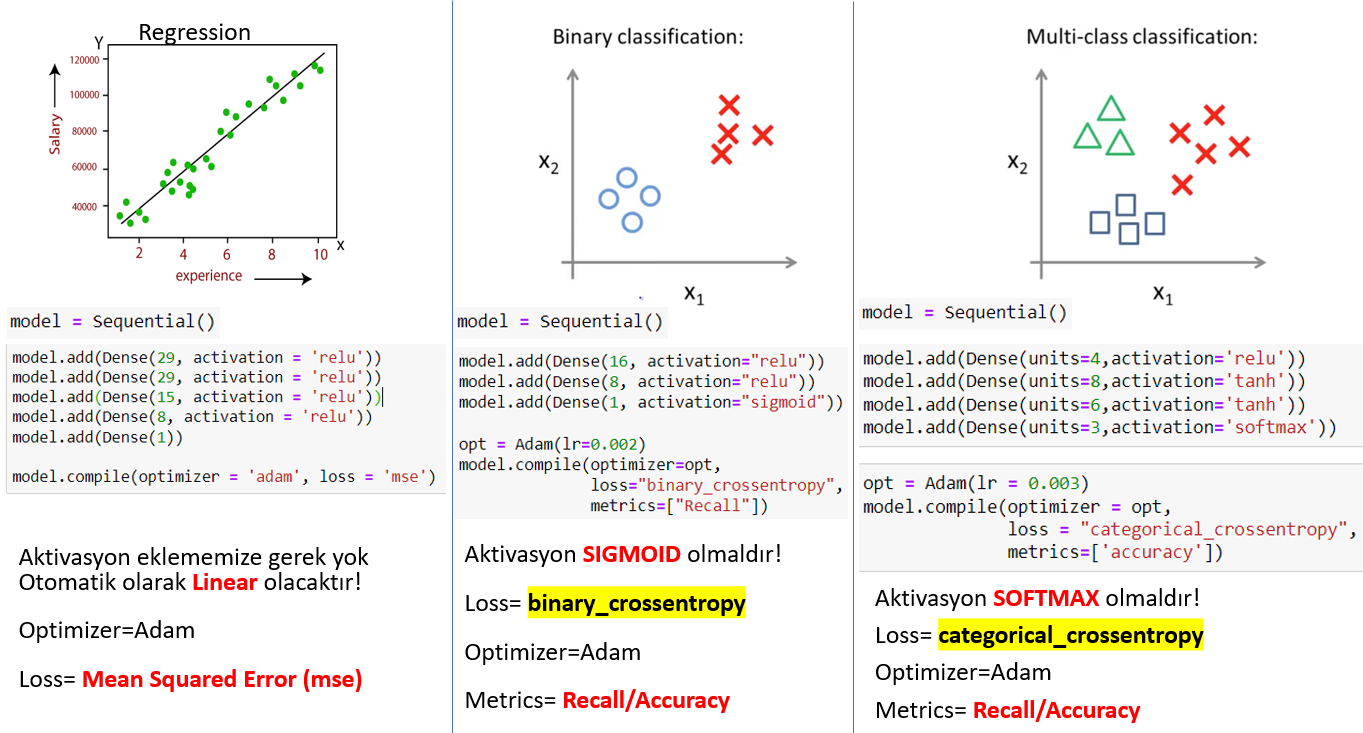

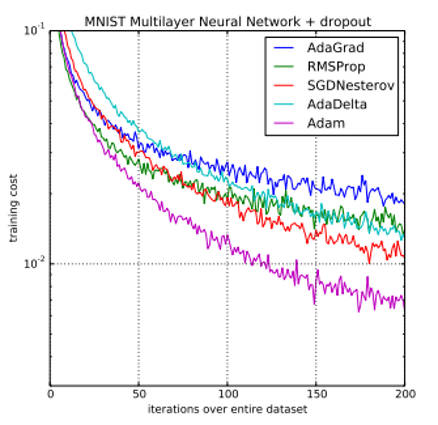

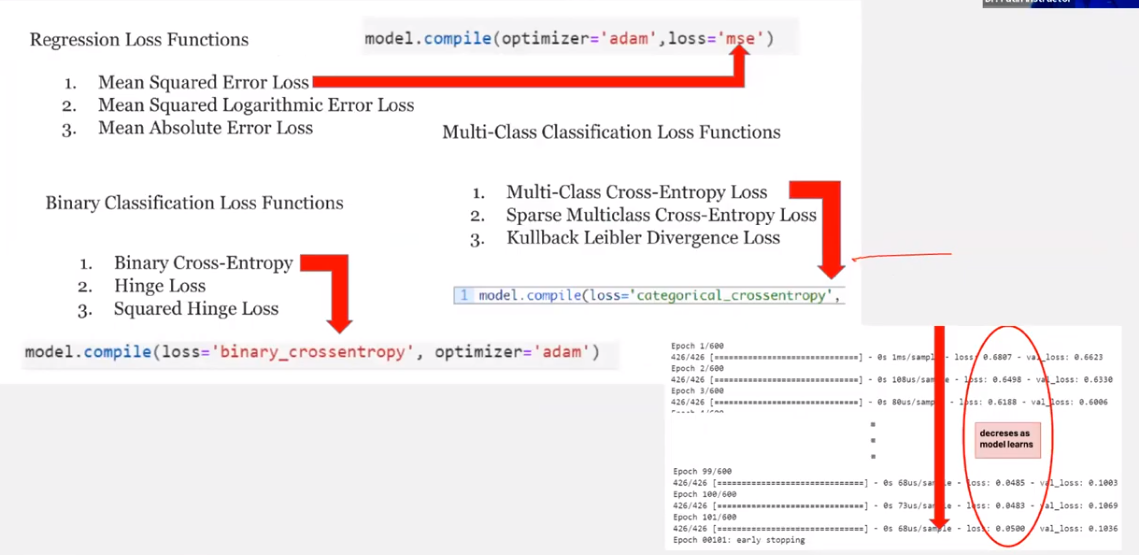

ölçeklendirilmiş X_train verileri, modelin fit() yöntemi aracılığıyla eğitilir. y_train ise hedef değişkenidir ve modelin öğrenmesi gereken çıktılardır. 

In [38]:
model.fit(x = X_train, y = y_train, batch_size = 32, epochs = 300) #250 defa tüm datayı modele sokacak her iterasyonda 32 satır kullandı (batch_size 32) 32 satırın ortalama hata değerini Gradientdecent ile parametreleri backpropogation ile güncelledi bir somraki epoc bu değerler üzerinden train edilecek bütün epoc lar bitene  kadar devam edecek 
#loss değeri  o epoc un en sonuncu değerini verir 
# batch_size için tek tek verilebilir hızlı olur ama doğruluk oranı azalır, yüksek verirsek süre uzar doğruluk oranı artar.datanın tamamı olursa çok yavaş olur fakat çok doğru sonuçlar alınır.
# datanın büyüklüğü ve süreye göre ayarlanır.

Epoch 1/300
22/22 [==============================] - 1s 2ms/step - loss: 256673.4688
Epoch 2/300
22/22 [==============================] - 0s 2ms/step - loss: 256591.8906
Epoch 3/300
22/22 [==============================] - 0s 2ms/step - loss: 256501.6250
Epoch 4/300
22/22 [==============================] - 0s 2ms/step - loss: 256395.5469
Epoch 5/300
22/22 [==============================] - 0s 2ms/step - loss: 256273.0312
Epoch 6/300
22/22 [==============================] - 0s 2ms/step - loss: 256131.8906
Epoch 7/300
22/22 [==============================] - 0s 2ms/step - loss: 255969.0781
Epoch 8/300
22/22 [==============================] - 0s 2ms/step - loss: 255785.0000
Epoch 9/300
22/22 [==============================] - 0s 2ms/step - loss: 255577.5156
Epoch 10/300
22/22 [==============================] - 0s 2ms/step - loss: 255344.0000
Epoch 11/300
22/22 [==============================] - 0s 2ms/step - loss: 255082.4688
Epoch 12/300
22/22 [==============================] - 0s 2ms/st

22/22 [==============================] - 0s 2ms/step - loss: 2455.8765
Epoch 97/300
22/22 [==============================] - 0s 2ms/step - loss: 2082.0742
Epoch 98/300
22/22 [==============================] - 0s 2ms/step - loss: 1964.9271
Epoch 99/300
22/22 [==============================] - 0s 2ms/step - loss: 1935.6968
Epoch 100/300
22/22 [==============================] - 0s 1ms/step - loss: 1909.0790
Epoch 101/300
22/22 [==============================] - 0s 1ms/step - loss: 1883.9802
Epoch 102/300
22/22 [==============================] - 0s 2ms/step - loss: 1860.6335
Epoch 103/300
22/22 [==============================] - 0s 1ms/step - loss: 1834.3164
Epoch 104/300
22/22 [==============================] - 0s 2ms/step - loss: 1808.2493
Epoch 105/300
22/22 [==============================] - 0s 2ms/step - loss: 1781.5530
Epoch 106/300
22/22 [==============================] - 0s 2ms/step - loss: 1752.7793
Epoch 107/300
22/22 [==============================] - 0s 2ms/step - loss: 1723.68

22/22 [==============================] - 0s 1ms/step - loss: 123.7876
Epoch 194/300
22/22 [==============================] - 0s 2ms/step - loss: 116.5335
Epoch 195/300
22/22 [==============================] - 0s 1ms/step - loss: 110.1442
Epoch 196/300
22/22 [==============================] - 0s 1ms/step - loss: 103.5797
Epoch 197/300
22/22 [==============================] - 0s 1ms/step - loss: 97.2286
Epoch 198/300
22/22 [==============================] - 0s 1ms/step - loss: 90.4568
Epoch 199/300
22/22 [==============================] - 0s 1ms/step - loss: 85.4091
Epoch 200/300
22/22 [==============================] - 0s 1ms/step - loss: 80.3125
Epoch 201/300
22/22 [==============================] - 0s 1ms/step - loss: 74.8595
Epoch 202/300
22/22 [==============================] - 0s 1ms/step - loss: 69.7972
Epoch 203/300
22/22 [==============================] - 0s 2ms/step - loss: 65.3856
Epoch 204/300
22/22 [==============================] - 0s 2ms/step - loss: 61.9700
Epoch 205/300


22/22 [==============================] - 0s 2ms/step - loss: 24.3929
Epoch 292/300
22/22 [==============================] - 0s 1ms/step - loss: 24.3863
Epoch 293/300
22/22 [==============================] - 0s 2ms/step - loss: 24.4394
Epoch 294/300
22/22 [==============================] - 0s 2ms/step - loss: 24.1345
Epoch 295/300
22/22 [==============================] - 0s 1ms/step - loss: 23.9930
Epoch 296/300
22/22 [==============================] - 0s 2ms/step - loss: 24.0091
Epoch 297/300
22/22 [==============================] - 0s 1ms/step - loss: 23.9981
Epoch 298/300
22/22 [==============================] - 0s 2ms/step - loss: 24.4583
Epoch 299/300
22/22 [==============================] - 0s 1ms/step - loss: 24.3539
Epoch 300/300
22/22 [==============================] - 0s 1ms/step - loss: 24.2077


bir epoch tamamlandığında, tüm batch'lerin loss değerlerinin ortalaması, epoch loss değerini oluşturur. 

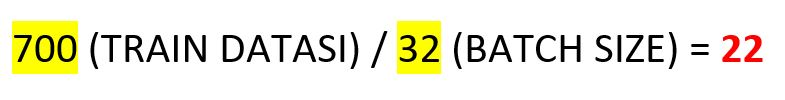

Iterasyon sayısı, veri kümesindeki örnek sayısının batch boyutuna bölünmesiyle hesaplanabilir. Bu durumda:

700 veri örneği ve 32'lik batch boyutu olduğu için iterasyon sayısı şu şekilde hesaplanır:

700 / 32 = 21.875

Batch boyutu tam sayı olması gerektiğinden, son iterasyonda kalan örnekler için ek bir iterasyon yapılır. Yani toplam iterasyon sayısı 22 olacaktır.

In [39]:
model.summary() # her katmanda kaç parametre olduğunu verir 

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 4)                 12        
                                                                 
 dense_9 (Dense)             (None, 4)                 20        
                                                                 
 dense_10 (Dense)            (None, 4)                 20        
                                                                 
 dense_11 (Dense)            (None, 1)                 5         
                                                                 
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


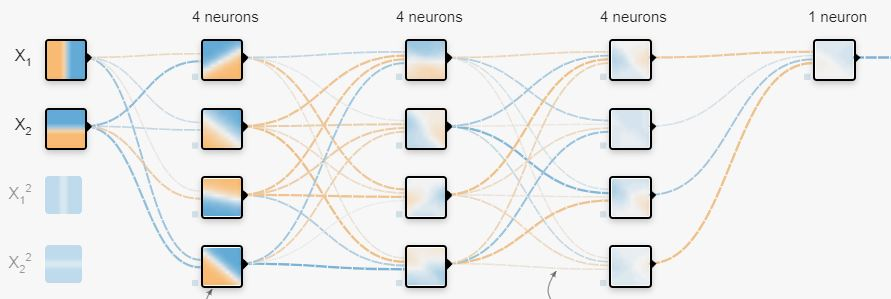

"model.weights" ifadesi, eğitim sonucu elde edilen ağırlıkları içerir. İlk verilen ağırlıkların (genellikle rastgele atanan ağırlıkların) saklanması için ayrı bir işlev kullanmanız gerekir.

Bir ANN modeli oluşturduğunuzda, başlangıçta modeldeki ağırlıklar genellikle rastgele atanır. Bu rastgele atanan ağırlıklar, modelin giriş verilerini kullanarak tahminler yapmasını sağlar. Ancak, tahminlerin çoğu zaman yanlış olacağından, model eğitim verileriyle beslenir ve eğitim sırasında ağırlıklar yavaş yavaş ayarlanarak daha iyi tahminler yapması sağlanır. Eğitim bittiğinde, modelin son ağırlıkları, eğitim verilerine en iyi uyacak şekilde ayarlanmış olan ağırlıklardır.

Bu nedenle, "model.weights" ifadesi, eğitim sürecinde modelin öğrendiği ağırlıkları içerir. İlk verilen rastgele ağırlıkları elde etmek isterseniz, "model.get_weights()" işlevini kullanabilirsiniz.

In [40]:
model.get_weights()

[array([[-0.88683033, -0.76662874,  2.0303037 , -0.5550349 ],
        [-0.7570543 , -0.4362316 ,  4.124793  , -0.6308172 ]],
       dtype=float32),
 array([0.        , 0.        , 0.72934544, 0.        ], dtype=float32),
 array([[ 0.29966575, -0.6334932 ,  0.58586067,  0.29947478],
        [ 0.741028  ,  0.74976116,  0.48167676,  0.52356666],
        [ 2.8022118 ,  3.1604009 ,  3.2650223 , -0.21587682],
        [-0.6891857 , -0.4066033 ,  0.06109208, -0.41687056]],
       dtype=float32),
 array([0.7051203, 0.7251644, 0.7100967, 0.       ], dtype=float32),
 array([[ 2.4634688 ,  2.9323094 ,  0.55689836,  0.585334  ],
        [ 1.7775689 ,  2.3924584 , -0.1099885 , -0.83314836],
        [ 2.88436   ,  2.6083493 , -0.36843342, -0.12604564],
        [-0.8603229 , -0.4854852 , -0.7141132 ,  0.27027196]],
       dtype=float32),
 array([ 0.7093232 ,  0.68957233, -0.1445193 ,  0.        ], dtype=float32),
 array([[ 2.326167  ],
        [ 2.8206267 ],
        [-0.45817086],
        [-0.49491704

Keras'ta, bir modelin ağırlıklarına erişmek için get_weights() yöntemini kullanabilirsiniz. Bu yöntem, bir numpy dizisi olarak ağırlıkların ve biasların bir listesini döndürür. Eğitim öncesi ağırlıkların elde edilmesi için, model eğitilmeden önce get_weights() yöntemi çağrılabilir ve ağırlıklar kaydedilebilir. Bu ağırlıklar daha sonra eğitim sonrası ağırlıklarla karşılaştırılabilir. Alternatif olarak, modelin ağırlıklarını kaydetmek için save_weights() yöntemi kullanılabilir ve eğitim öncesi ağırlıkların kaydedilmiş bir sürümü yine load_weights() yöntemi ile geri yüklenebilir.

In [41]:
model.weights #eğitim sonrası ağırlık değerleri

[<tf.Variable 'dense_8/kernel:0' shape=(2, 4) dtype=float32, numpy=
 array([[-0.88683033, -0.76662874,  2.0303037 , -0.5550349 ],
        [-0.7570543 , -0.4362316 ,  4.124793  , -0.6308172 ]],
       dtype=float32)>,
 <tf.Variable 'dense_8/bias:0' shape=(4,) dtype=float32, numpy=array([0.        , 0.        , 0.72934544, 0.        ], dtype=float32)>,
 <tf.Variable 'dense_9/kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[ 0.29966575, -0.6334932 ,  0.58586067,  0.29947478],
        [ 0.741028  ,  0.74976116,  0.48167676,  0.52356666],
        [ 2.8022118 ,  3.1604009 ,  3.2650223 , -0.21587682],
        [-0.6891857 , -0.4066033 ,  0.06109208, -0.41687056]],
       dtype=float32)>,
 <tf.Variable 'dense_9/bias:0' shape=(4,) dtype=float32, numpy=array([0.7051203, 0.7251644, 0.7100967, 0.       ], dtype=float32)>,
 <tf.Variable 'dense_10/kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[ 2.4634688 ,  2.9323094 ,  0.55689836,  0.585334  ],
        [ 1.7775689 ,  2.3924584 , -0.10998

In [42]:
model.history.history # model eğitilirken çıkan loss değerlerini verir

{'loss': [256673.46875,
  256591.890625,
  256501.625,
  256395.546875,
  256273.03125,
  256131.890625,
  255969.078125,
  255785.0,
  255577.515625,
  255344.0,
  255082.46875,
  254791.0625,
  254466.671875,
  254110.234375,
  253714.8125,
  253279.9375,
  252805.84375,
  252287.9375,
  251724.3125,
  251112.9375,
  250445.328125,
  249726.828125,
  248949.0,
  248118.125,
  247218.3125,
  246257.515625,
  245234.15625,
  244134.453125,
  242963.6875,
  241720.703125,
  240399.5,
  238986.453125,
  237499.21875,
  235923.40625,
  234258.328125,
  232508.25,
  230658.1875,
  228708.828125,
  226660.109375,
  224518.609375,
  222267.90625,
  219909.28125,
  217452.609375,
  214880.59375,
  212201.515625,
  209412.921875,
  206504.9375,
  203468.84375,
  200309.78125,
  197053.28125,
  193677.84375,
  190172.5,
  186563.921875,
  182827.78125,
  178998.671875,
  175036.765625,
  170957.84375,
  166769.890625,
  162453.9375,
  158034.671875,
  153539.96875,
  148930.890625,
  144208.015

In [43]:
pd.DataFrame(model.history.history)

,loss
0,256673.469
1,256591.891
2,256501.625
3,256395.547
4,256273.031
5,256131.891
6,255969.078
7,255785.000
8,255577.516
9,255344.000


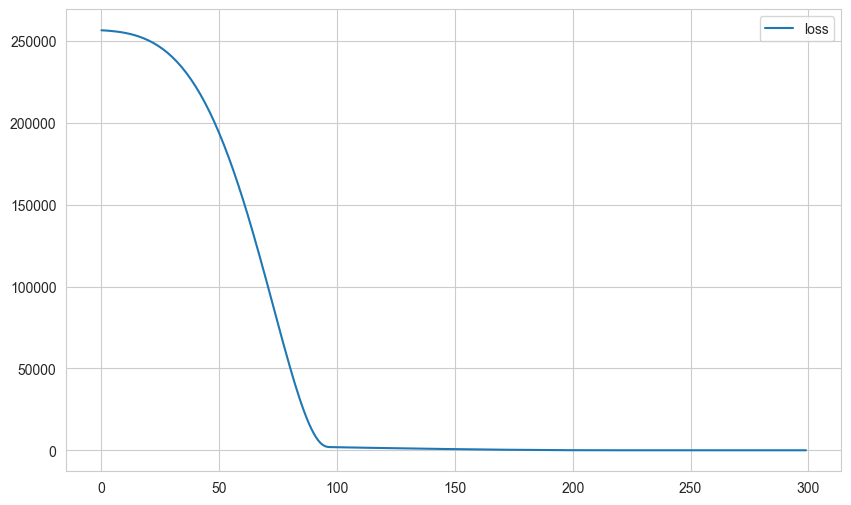

In [44]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()
plt.show();

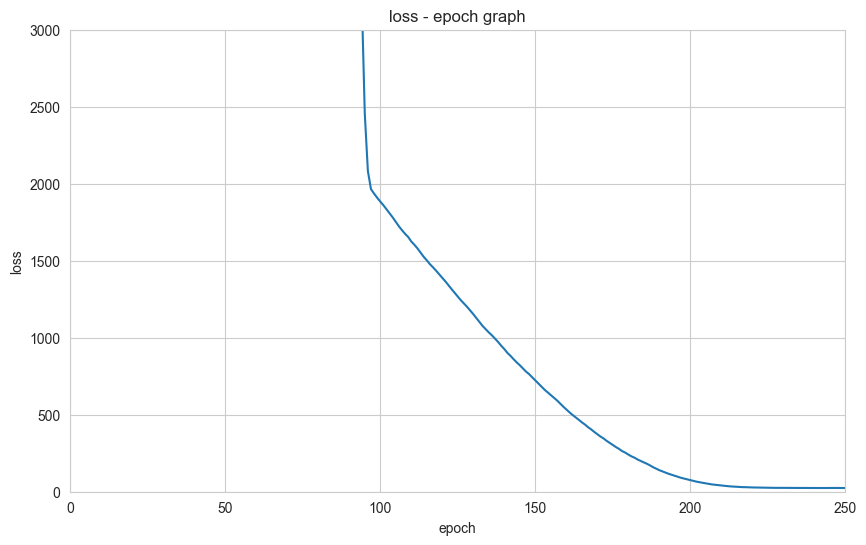

In [45]:
fig, ax= plt.subplots()
ax.plot(loss_df)
ax.set_xlabel("epoch")
ax.set_ylabel("loss")
ax.set_title("loss - epoch graph")
ax.set_xlim([0, 250]) # focusing on the given x values
ax.set_ylim([0, 3000]) # focusing on the given y values
plt.show();

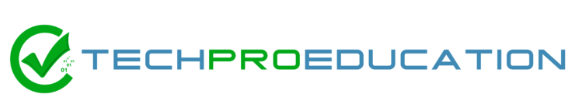

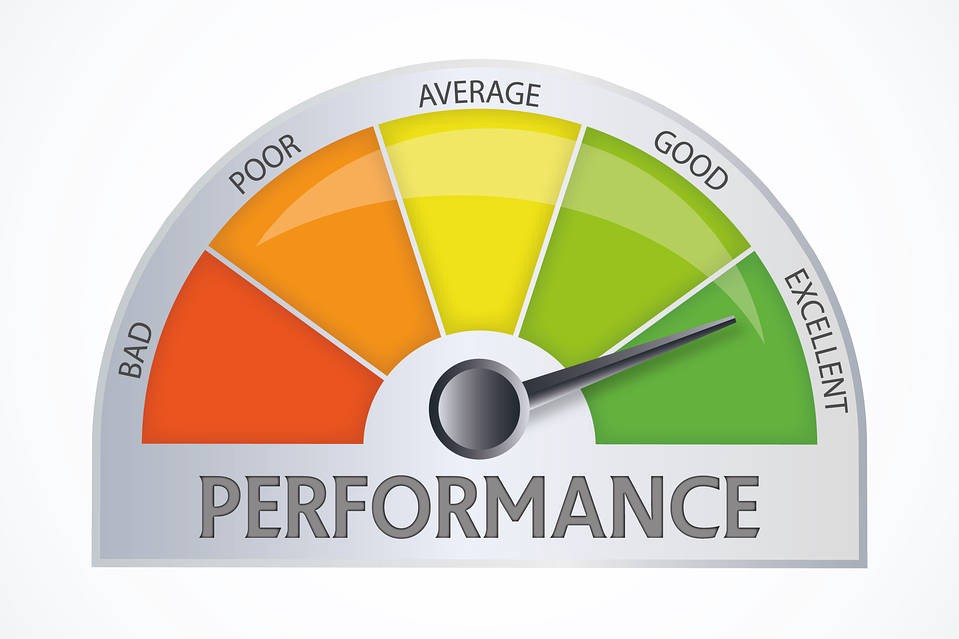

## Model Performance

In [46]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score

In [47]:
model.evaluate(X_train, y_train, verbose=0) # model oluştururken loss'a hangi skoru verdiysem onun sonucunu verir. "mse"
# arka planda x ve y testi predict alıp sonra evaluate sonucunu veriyor

23.830251693725586

In [48]:
model.evaluate(X_test, y_test, verbose=0)

24.949892044067383

In [49]:
model.evaluate(X_test, y_test, verbose=2)

10/10 - 0s - loss: 24.9499 - 35ms/epoch - 4ms/step


24.949892044067383

In [50]:
y_pred = model.predict(X_test)

10/10 [==============================] - 0s 2ms/step


In [51]:
explained_variance_score(y_test, y_pred) # R2 skorunu verir 1 e yakınsa iyidir

0.9971631231284496

Bu kod bloğu, bir makine öğrenmesi modelinin test verileri üzerindeki tahminlerinin doğruluğunu ölçmek için kullanılan bir metrik olan "explained variance score" (açıklanan varyans skoru) hesaplamak için kullanılır.

İlk satır, "model.predict(X_test)" kullanarak, X_test veri kümesindeki özelliklere dayanarak modelin y_test verileri için tahminlerini oluşturur. Tahminler, y_pred değişkeninde saklanır.

İkinci satır, "explained_variance_score" fonksiyonunu kullanarak gerçek y_test verileri ve tahmin edilen y_pred verileri arasındaki farkı hesaplar. Bu skor, gerçek verilerin değişkenliğini ne kadar iyi açıkladığını gösterir. Skor 0 ile 1 arasında bir değer alabilir ve ne kadar yüksek olursa, modelin tahminleri gerçek verilere o kadar yakındır.

In [52]:
my_dict = {"Actual" : y_test, "Pred" : y_pred.reshape(-1,)}
compare = pd.DataFrame(my_dict)
compare.sample(10)

# gerçek ve tahmin değerlerini kıyaslarız
#büyük datalarda  milyonluk datalarda DL modeller tercih edilir 

,Actual,Pred
58,455.140,447.050
286,612.470,611.889
166,511.367,512.349
179,547.713,547.030
99,511.893,518.643
28,656.655,655.505
293,560.938,555.177
100,610.092,605.096
154,380.477,372.252
11,547.732,548.982


Bu kod bloğu, test setindeki gerçek ve tahmin edilen değerleri karşılaştırmak için kullanılır.

İlk satır, "my_dict" adlı bir sözlük oluşturur. Bu sözlük, iki anahtar değerine sahiptir: "Actual" ve "Pred". "Actual" anahtarının değeri, y_test adlı gerçek hedef değişkeninin tamamını içerirken, "Pred" anahtarının değeri, modelin tahminleri olan y_pred değişkenini bir boyutlu dizi olarak içerir. "reshape(-1,)" kullanarak y_pred dizisini bir boyut küçültür ve bir dizi haline getirir.

İkinci satır, "compare" adlı bir DataFrame oluşturur. Bu DataFrame, "Actual" ve "Pred" sütunlarını içerir ve bunların değerleri, sözlükten alınır. "sample(10)" metodu, DataFrame'den rastgele 10 örnek alarak ve bu örnekleri ekranda göstererek karşılaştırma işlemini görselleştirir.

Bu kod bloğu, gerçek ve tahmin edilen değerler arasındaki farkları gösteren bir tablo oluşturur ve bu tablo, modelin performansını değerlendirmeye yardımcı olur.

In [53]:
sns.scatterplot(x = 'Actual', y = 'Pred', data = compare)

<AxesSubplot: xlabel='Actual', ylabel='Pred'>

Bu kod bloğu, "compare" DataFrame'inin "Actual" ve "Pred" sütunlarındaki verileri kullanarak, gerçek değerler ile tahmin edilen değerler arasındaki ilişkiyi görselleştirmek için seaborn kütüphanesindeki "scatterplot" fonksiyonunu kullanır.

"scatterplot" fonksiyonu, x ve y eksenlerindeki değişkenleri belirterek bir saçılım grafiği çizer. "x" parametresi, "Actual" sütunundan alınan gerçek değerleri, "y" parametresi ise "Pred" sütunundan alınan tahmin edilen değerleri temsil eder. "data" parametresi, verilerin bulunduğu DataFrame'i belirtir.

Bu kod bloğu, gerçek ve tahmin edilen değerler arasındaki ilişkiyi gösteren bir saçılım grafiği oluşturur. Eğer model doğru tahminler yapmışsa, saçılım grafiğindeki noktaların bir çizgiye yakın bir şekilde yerleşeceği beklenir.

In [54]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:", mse, "\nrmse:", rmse)

In [55]:
eval_metric(y_test, y_pred)

r2_score: 0.9971622146150793 
mae: 3.99939704925697 
mse: 24.949898963868502 
rmse: 4.994987383754688


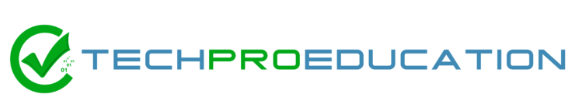

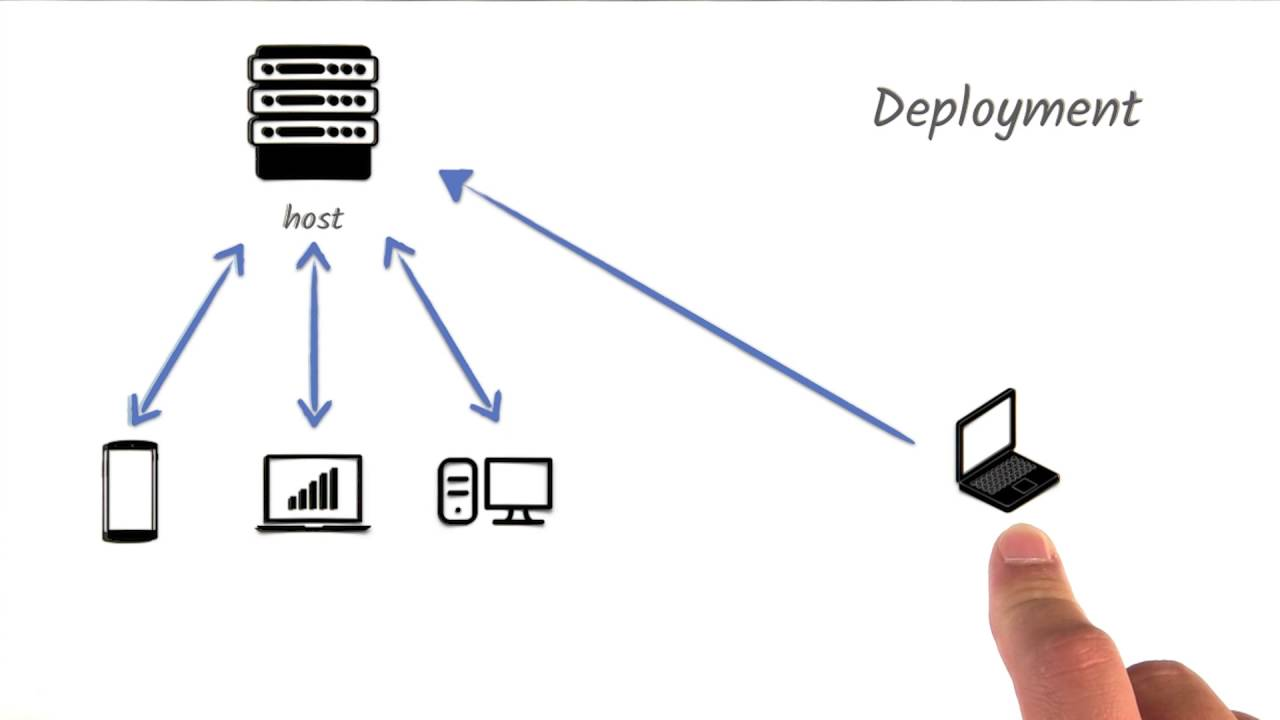

## Final Model and Model Deployment

In [56]:
scaler = MinMaxScaler().fit(X)

Final modelde, MinMaxScaler kullanarak veri ölçeklendirmesi yapılması gerekir. Bu, özellikle makine öğrenmesi modeli kullanarak tahmin yaparken veri özelliklerinin ölçeklendirilmesi ile ilgilidir.

MinMaxScaler, verileri 0 ile 1 arasında ölçeklemek için kullanılan bir ölçeklendirme yöntemidir. Bu yöntem, verilerin orijinal aralığını korur ve verilerin özelliklerinin benzer aralıklarda olmasını sağlar. Bu, bir özelliğin diğer özellikler tarafından domine edilmesini önleyerek, modelin daha iyi çalışmasına yardımcı olur.

Özellikle, makine öğrenmesi algoritmaları, verilerin ölçeklenmesinden büyük ölçüde etkilenir. Bazı algoritmalar, ölçeklendirilmiş veriler üzerinde daha iyi sonuçlar verirken, ölçeklenmemiş veriler üzerinde hatalar yapabilirler. Bu nedenle, final modelde de verilerin ölçeklenmesi, daha iyi ve tutarlı sonuçlar elde etmek için önemlidir.

In [57]:
import pickle
pickle.dump(scaler, open("scaler_fake_reg", 'wb'))

Python'da pickle modülünü kullanarak bir MinMaxScaler nesnesini ("scaler" adıyla) seri hale getirip, "scaler_fake_reg" adlı bir dosyaya yazmayı amaçlar. Bu, modeli tekrar kullanmak istediğimizde, ölçekleyici nesnesini yeniden yükleyebilmemize olanak tanır.

İlk olarak, "pickle" modülü içe aktarılır. Daha sonra, "dump" fonksiyonu kullanılarak "scaler" adlı MinMaxScaler nesnesi, "wb" modunda (yani yazma ve ikili modda) açılan "scaler_fake_reg" adlı dosyaya seri hale getirilir ve yazılır. Bu, ölçekleyici nesnesinin dosyaya kaydedilmesini sağlar.

Bu yöntem, modelin veriye göre ölçeklendirilmesi sırasında kullanılan MinMaxScaler nesnesini kaydetmemizi sağlar. Daha sonra modeli yeniden kullanmak istediğimizde, kaydedilen nesneyi kullanarak yeni verileri aynı şekilde ölçeklendirebiliriz.

In [58]:
X_scaled = scaler.transform(X)

Final modelde, MinMaxScaler kullanarak veri ölçeklendirme işlemi yapıldıktan sonra, verilerin ölçeklendirilmiş sürümünün elde edilmesi gerekir. Bu, modelin eğitim verileri üzerinde eğitilirken ölçeklenmiş verileri kullanmasını sağlar ve aynı ölçeklendirme işlemi test verileri üzerinde uygulandığında tutarlılık sağlar.

Bu nedenle, "scaler" nesnesi ile "transform" fonksiyonu kullanılarak, "X" veri kümesinin ölçeklendirilmiş sürümü olan "X_scaled" elde edilir. Bu, her özellik için verilerin orijinal aralığını korurken, özelliklerin benzer aralıklarda olmasını sağlar.

Sonuç olarak, model, ölçeklendirilmiş veriler üzerinde eğitildiği için, yeni veriler ölçeklendirildiğinde aynı ölçeklendirme işleminin uygulandığından emin olmak için "transform" fonksiyonu kullanılır. Bu, daha tutarlı ve güvenilir sonuçlar elde etmek için önemlidir.

In [59]:
final_model = Sequential()

final_model.add(Dense(units = 4, activation = "relu"))     # input_dim = 2 or input_dim = X_train.shape[0]
final_model.add(Dense(units = 4, activation = "relu"))
final_model.add(Dense(units = 4, activation = "relu"))
final_model.add(Dense(1))

final_model.compile(optimizer = "rmsprop", loss = "mse")

final_model.fit(x = X_scaled, y = y, batch_size = 32, epochs = 300)

Epoch 1/300
32/32 [==============================] - 1s 1ms/step - loss: 256226.9062
Epoch 2/300
32/32 [==============================] - 0s 1ms/step - loss: 255668.4844
Epoch 3/300
32/32 [==============================] - 0s 2ms/step - loss: 255029.0312
Epoch 4/300
32/32 [==============================] - 0s 2ms/step - loss: 254223.7188
Epoch 5/300
32/32 [==============================] - 0s 2ms/step - loss: 253151.7344
Epoch 6/300
32/32 [==============================] - 0s 2ms/step - loss: 251915.8750
Epoch 7/300
32/32 [==============================] - 0s 2ms/step - loss: 250464.9375
Epoch 8/300
32/32 [==============================] - 0s 2ms/step - loss: 248780.3906
Epoch 9/300
32/32 [==============================] - 0s 2ms/step - loss: 246873.0156
Epoch 10/300
32/32 [==============================] - 0s 1ms/step - loss: 244696.9062
Epoch 11/300
32/32 [==============================] - 0s 2ms/step - loss: 242221.4219
Epoch 12/300
32/32 [==============================] - 0s 2ms/st

32/32 [==============================] - 0s 2ms/step - loss: 30.0093
Epoch 99/300
32/32 [==============================] - 0s 2ms/step - loss: 28.1661
Epoch 100/300
32/32 [==============================] - 0s 2ms/step - loss: 27.2564
Epoch 101/300
32/32 [==============================] - 0s 2ms/step - loss: 26.3960
Epoch 102/300
32/32 [==============================] - 0s 2ms/step - loss: 26.1032
Epoch 103/300
32/32 [==============================] - 0s 2ms/step - loss: 25.8044
Epoch 104/300
32/32 [==============================] - 0s 2ms/step - loss: 25.6255
Epoch 105/300
32/32 [==============================] - 0s 2ms/step - loss: 25.7272
Epoch 106/300
32/32 [==============================] - 0s 2ms/step - loss: 25.5217
Epoch 107/300
32/32 [==============================] - 0s 2ms/step - loss: 25.2492
Epoch 108/300
32/32 [==============================] - 0s 2ms/step - loss: 24.9872
Epoch 109/300
32/32 [==============================] - 0s 2ms/step - loss: 25.1802
Epoch 110/300
32/32

32/32 [==============================] - 0s 2ms/step - loss: 25.1771
Epoch 197/300
32/32 [==============================] - 0s 2ms/step - loss: 24.8300
Epoch 198/300
32/32 [==============================] - 0s 2ms/step - loss: 24.5214
Epoch 199/300
32/32 [==============================] - 0s 2ms/step - loss: 24.7863
Epoch 200/300
32/32 [==============================] - 0s 2ms/step - loss: 24.5068
Epoch 201/300
32/32 [==============================] - 0s 2ms/step - loss: 25.0527
Epoch 202/300
32/32 [==============================] - 0s 2ms/step - loss: 24.6422
Epoch 203/300
32/32 [==============================] - 0s 2ms/step - loss: 24.5971
Epoch 204/300
32/32 [==============================] - 0s 2ms/step - loss: 25.0636
Epoch 205/300
32/32 [==============================] - 0s 2ms/step - loss: 25.0597
Epoch 206/300
32/32 [==============================] - 0s 2ms/step - loss: 25.0049
Epoch 207/300
32/32 [==============================] - 0s 2ms/step - loss: 24.7905
Epoch 208/300
32/3

32/32 [==============================] - 0s 2ms/step - loss: 24.7926
Epoch 295/300
32/32 [==============================] - 0s 2ms/step - loss: 25.0135
Epoch 296/300
32/32 [==============================] - 0s 2ms/step - loss: 24.5623
Epoch 297/300
32/32 [==============================] - 0s 2ms/step - loss: 24.9848
Epoch 298/300
32/32 [==============================] - 0s 2ms/step - loss: 24.7111
Epoch 299/300
32/32 [==============================] - 0s 2ms/step - loss: 24.7969
Epoch 300/300
32/32 [==============================] - 0s 2ms/step - loss: 24.6180


H5 is a file format to store structured data, it's not a model by itself. Keras saves models in this format as it can easily store the weights and model configuration in a single file.

In [60]:
final_model.save('model_fake_reg.h5')  # creates a HDF5 file 'my_model.h5'

HDF5 (H5) dosya biçimi, büyük veri kümeleri için optimize edilmiş bir dosya formatıdır. Bu nedenle, derin öğrenme modeli gibi büyük veri setleriyle çalışırken, modelin tüm ağırlıklarını ve yapısını depolamak için H5 dosya biçimi kullanmak daha uygun olabilir. H5 dosyaları, büyük veri kümelerini hızlı ve kolay bir şekilde depolamak, yükleme, paylaşmak ve işlemek için kullanılan bir veri depolama formatıdır.

Özellikle, yapay sinir ağı (ANN) modelleri, ağ yapılarının ve ağırlıklarının büyüklüğü nedeniyle çok fazla bellek kullanabilirler. Bu nedenle, modelin tüm yapılarını ve ağırlıklarını H5 dosyası biçiminde kaydetmek, modeli daha sonra yeniden yüklemek için kolay bir yöntemdir.

Ayrıca, H5 dosyaları, farklı programlama dillerinde (Python, R, Matlab vb.) kodlanmış uygulamalar arasında veri paylaşımını kolaylaştırır. Bu, modeli paylaşmanın ve farklı ortamlarda kullanmanın daha kolay hale gelmesini sağlar.

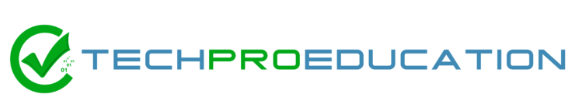

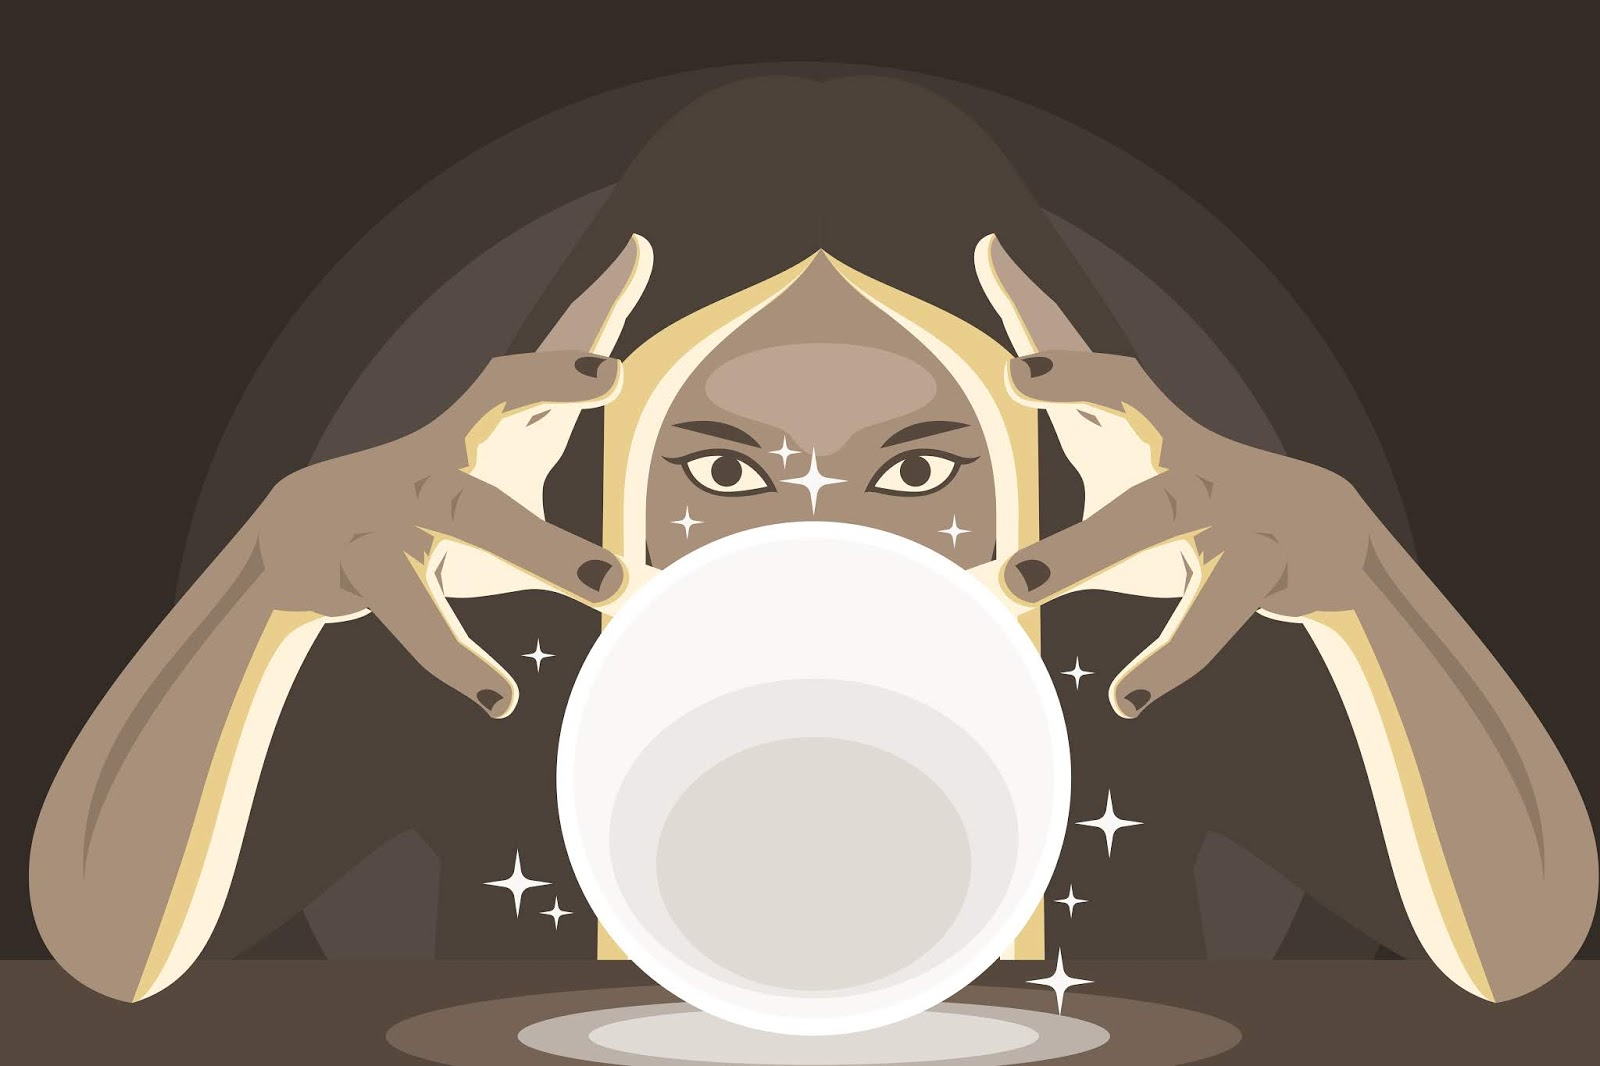

## Prediction-1

In [61]:
from tensorflow.keras.models import load_model # modeli  yükleriz 

In [62]:
model_fake_reg = load_model('model_fake_reg.h5')

In [63]:
scaler_fake_reg = pickle.load(open("scaler_fake_reg", "rb"))

In [64]:
sample = [[998, 1000]]

In [65]:
sample_scaled = scaler_fake_reg.transform(sample)

In [66]:
model_fake_reg.predict(sample_scaled)

1/1 [==============================] - 0s 86ms/step


array([[417.21667]], dtype=float32)

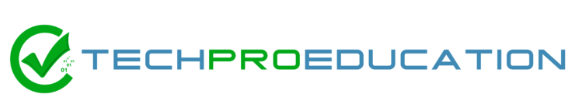

## Prediction-2

In [67]:
my_dict = {"Feature1": [997, 998, 999, 1000, 1001],  # birden fazla değerrleride pred yapabiliriz.
           "Feature2": [1000, 999, 998, 997, 996]}   # scale yaptığımızdan array olarak sonuç vereceği için array a çevirmeye gerek yok

In [68]:
sample = pd.DataFrame(my_dict)
sample

,Feature1,Feature2
0,997,1000
1,998,999
2,999,998
3,1000,997
4,1001,996


In [69]:
sample_scaled = scaler_fake_reg.transform(sample)
sample_scaled

array([[-0.00948799,  0.52980619],
       [ 0.15312457,  0.35345977],
       [ 0.31573713,  0.17711336],
       [ 0.47834969,  0.00076694],
       [ 0.64096225, -0.17557948]])

In [70]:
model_fake_reg.predict(sample_scaled)

1/1 [==============================] - 0s 28ms/step


array([[377.32428],
       [329.1415 ],
       [280.9587 ],
       [232.77592],
       [184.59314]], dtype=float32)

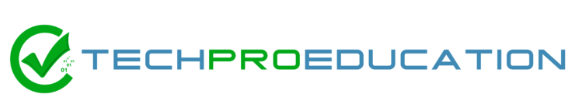